/home/salva/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


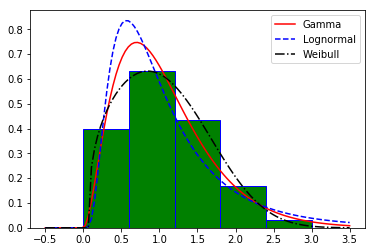

In [1]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt

np.random.seed(12345)
size = 100

# create some exponential random data
values = stats.expon.rvs(scale=1/4, size=size)

# Create gaussian noise
noise = stats.norm.rvs(size=size)

real_data = values + np.abs(noise)

# plot normed histogram
plt.hist(real_data, bins=np.linspace(0,3,6), normed=True, facecolor='green', edgecolor='blue')

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
# xmin, xmax = min(real_data), max(real_data) 
lnspc = np.linspace(xmin, xmax, len(real_data))

# Gamma fitting
ag, locg, scaleg = stats.gamma.fit(real_data, floc=0)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, locg, scaleg)  
# plots gamma pdf for fitted parameters
plt.plot(lnspc, pdf_gamma, '-r', label="Gamma")  

# exactly same as above for lognorm
sl, locl, scalel = stats.lognorm.fit(real_data, floc=0)
pdf_ln = stats.lognorm.pdf(lnspc, s=sl, loc=locl, scale=scalel) 
plt.plot(lnspc, pdf_ln, '--b', label="Lognormal")

# exactly same as above for weibull
aw, cw, locw, scalew = stats.exponweib.fit(real_data)
pdf_w = stats.exponweib.pdf(lnspc, a=aw, c=cw, loc=locw, scale=scalew)  
plt.plot(lnspc, pdf_w, '-.k', label="Weibull")

plt.legend()
plt.show()

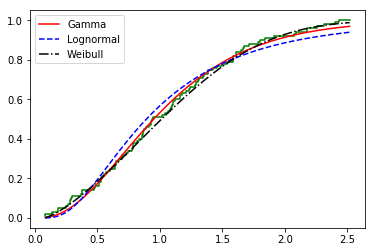

In [2]:
from statsmodels.distributions.empirical_distribution import ECDF

# Calculate empirical cdf of real_data
ecdf = ECDF(real_data)
# Plot empirical cdf as step function
plt.step(ecdf.x, ecdf.y, "g")

xmin, xmax = min(real_data), max(real_data) 
lnspc = np.linspace(xmin, xmax, len(real_data))

cdf_gamma = stats.gamma.cdf(lnspc, ag, locg, scaleg)  
plt.plot(lnspc, cdf_gamma, '-r', label="Gamma")
cdf_ln = stats.lognorm.cdf(lnspc, s=sl, loc=locl, scale=scalel)  
plt.plot(lnspc, cdf_ln, '--b', label="Lognormal")
cdf_w = stats.exponweib.cdf(lnspc, a=aw, c=cw, loc=locw, scale=scalew)  
plt.plot(lnspc, cdf_w, '-.k', label="Weibull")

plt.legend()
plt.show()

In [3]:
# Perform KS test

print("KS test for weibull:\n", stats.kstest(real_data, "exponweib", (aw, cw, locw, scalew)))
print("KS test for gamma:\n", stats.kstest(real_data, "gamma", (ag, locg, scaleg)))
print("KS test for lognormal:\n", stats.kstest(real_data, "lognorm", (sl, locl, scalel)))

KS test for weibull:
 KstestResult(statistic=0.040725191450298126, pvalue=0.9963797274549937)
KS test for gamma:
 KstestResult(statistic=0.05597479230118374, pvalue=0.91269354715272333)
KS test for lognormal:
 KstestResult(statistic=0.088517798275442428, pvalue=0.39366219434918026)
